In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import tensorflow as tf


In [2]:
#Get the data
df =pd.read_csv('Apple_Nasd.csv')
df

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,...,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,...,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,...,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,...,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,...,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,...,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2021-09-24,145.660004,147.470001,145.559998,146.92,146.71,53477900,0.09,0.06,1.24,...,15067.56,14946.57,15047.70,15047.70,3972140000,-4.54,0.03,1.69,4.8,3.25
2324,2021-09-27,145.470001,145.960007,143.820007,145.37,145.16,74150700,-1.55,1.07,1.24,...,15003.16,14864.96,14969.97,14969.97,4619450000,-77.73,0.52,1.69,4.8,3.25
2325,2021-09-28,143.250000,144.750000,141.690002,141.91,141.70,108972300,-3.46,2.44,1.24,...,14817.74,14539.88,14546.68,14546.68,4954270000,-423.29,2.91,1.69,4.8,3.25
2326,2021-09-29,142.470001,144.449997,142.029999,142.83,142.62,74602000,0.92,0.64,1.24,...,14676.62,14493.67,14512.44,14512.44,5246170000,-34.24,0.24,1.69,4.8,3.25


In [3]:
df.shape

(2328, 21)

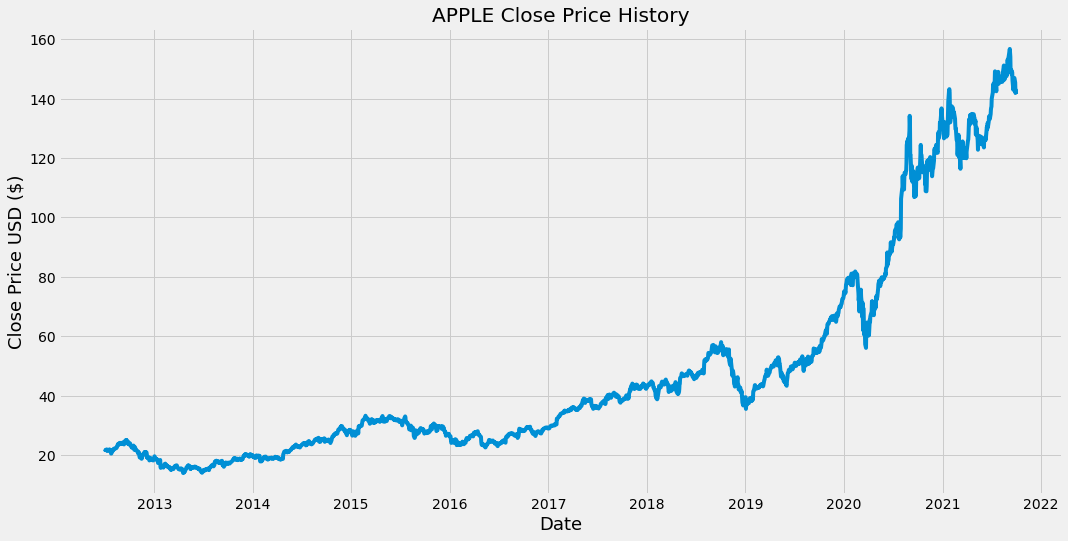

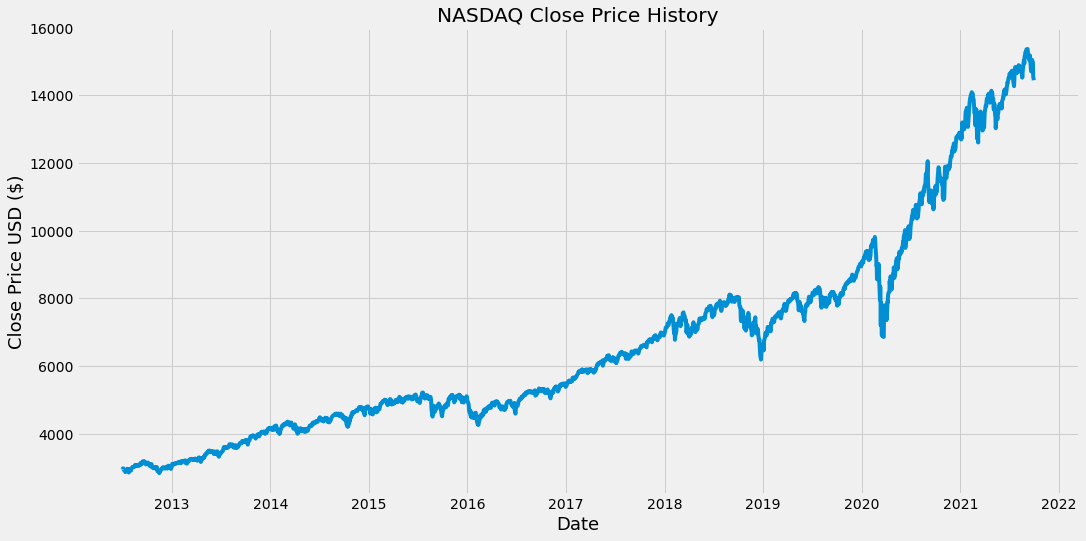

In [4]:
# visualize the closing price history
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('APPLE Close Price History')
plt.plot(df['Appl_Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# visualize the closing price history
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('NASDAQ Close Price History')
plt.plot(df['Nasd_Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [5]:
data = df.filter(['Appl_Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number or rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len 

1863

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05051142],
       [0.05226286],
       [0.05485498],
       ...,
       [0.89645509],
       [0.90290038],
       [0.89358274]])

In [7]:
#Create training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.05051142, 0.05226286, 0.05485498, 0.05387418, 0.05583579,
       0.05443464, 0.05352389, 0.05212274, 0.053664  , 0.05415441,
       0.05415441, 0.05394423, 0.0559759 , 0.05345383, 0.05338377,
       0.05261314, 0.0460978 , 0.0460978 , 0.04868993, 0.05114194,
       0.05506515, 0.05408435, 0.05436458, 0.05632619, 0.05800757,
       0.05765728, 0.05737705, 0.05758722, 0.05779739, 0.05989912,
       0.06031946, 0.06010929, 0.06151044, 0.06445285, 0.06872636,
       0.06641446, 0.0696371 , 0.06809584, 0.06823595, 0.07131848,
       0.07110831, 0.07075802, 0.06837607, 0.06872636, 0.07117837,
       0.06998739, 0.0714586 , 0.07250946, 0.06809584, 0.06753538,
       0.06984727, 0.07313997, 0.0752417 , 0.07734342, 0.07790388,
       0.07797394, 0.07706319, 0.07741348, 0.07510158, 0.07082808])]
[0.06872635561160154]

[array([0.05051142, 0.05226286, 0.05485498, 0.05387418, 0.05583579,
       0.05443464, 0.05352389, 0.05212274, 0.053664  , 0.05415441,
       0.05415441, 0.05394423, 0.05

In [8]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train.shape

(1803, 60)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1803, 60, 1)

In [11]:
# Build the LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train,y_train,epochs=1,batch_size=1)

1803/1803 [==============================] - 31s 16ms/step - loss: 2.6760e-04


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 1803 to 2329
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [15]:
# Convert the data into a numpy array
x_test = np.array(x_test)

In [16]:
x_test.shape

(465, 60)

In [17]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [19]:
# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.8291884467012137

<ipython-input-20-303d8f4b7186>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


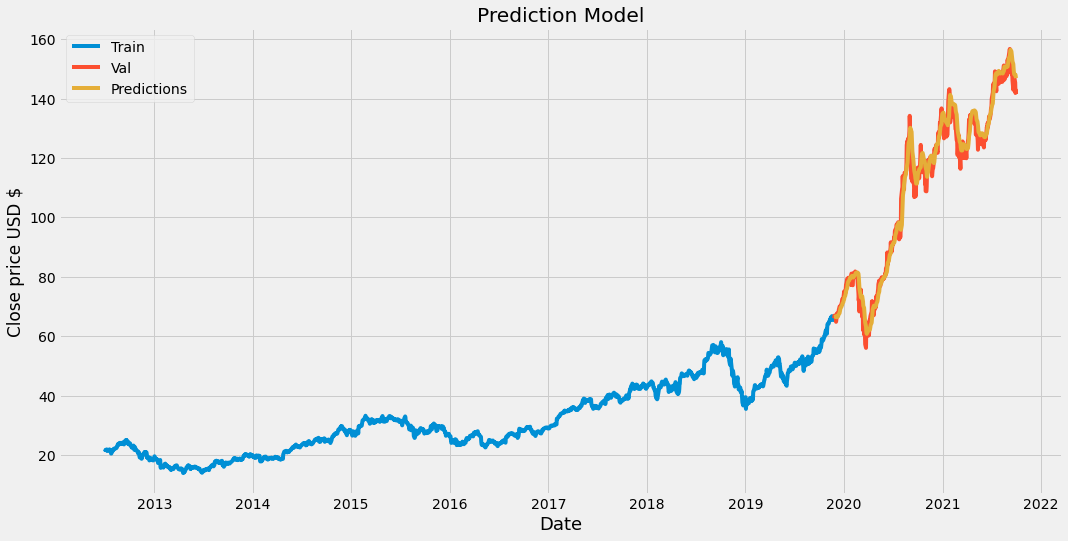

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD $')
plt.plot(train['Appl_Close'])
plt.plot(valid[['Appl_Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [21]:
# Show the valid and predicted price
valid

,Appl_Close,Predictions
Date,,
2019-11-26,66.07,66.422394
2019-11-27,66.96,66.440300
2019-11-29,66.81,66.564461
2019-12-02,66.04,66.706200
2019-12-03,64.86,66.746033
...,...,...
2021-09-24,146.92,148.063080
2021-09-27,145.37,148.080078
2021-09-28,141.91,148.010147
